<a href="https://colab.research.google.com/github/emreyoruk15/githubTest/blob/main/CS412_HW1_EmreYoruk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Loading**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Split training data into 80% train, 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0, stratify=y_train)


# Print dataset shapes
print(f"Training set shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, Labels: {y_val.shape}")
print(f"Test set shape: {x_test.shape}, Labels: {y_test.shape}")


Training set shape: (48000, 28, 28), Labels: (48000,)
Validation set shape: (12000, 28, 28), Labels: (12000,)
Test set shape: (10000, 28, 28), Labels: (10000,)


**Class Distribution**

Digit 0: Train=4738, Validation=1185, Test=980
Digit 1: Train=5394, Validation=1348, Test=1135
Digit 2: Train=4766, Validation=1192, Test=1032
Digit 3: Train=4905, Validation=1226, Test=1010
Digit 4: Train=4674, Validation=1168, Test=982
Digit 5: Train=4337, Validation=1084, Test=892
Digit 6: Train=4734, Validation=1184, Test=958
Digit 7: Train=5012, Validation=1253, Test=1028
Digit 8: Train=4681, Validation=1170, Test=974
Digit 9: Train=4759, Validation=1190, Test=1009


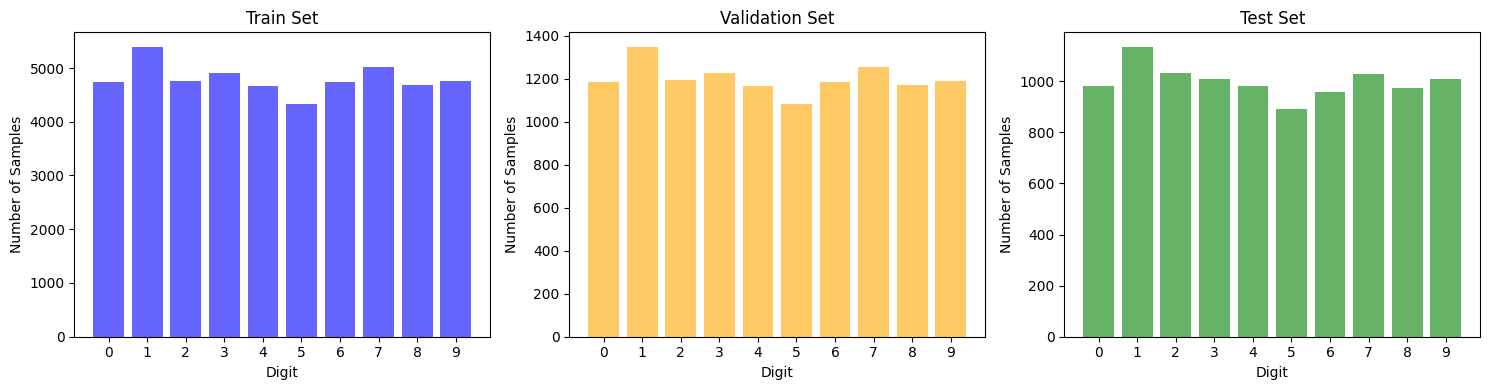

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Count occurrences of each digit
unique, train_counts = np.unique(y_train, return_counts=True)
_, val_counts = np.unique(y_val, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

# Display counts
for i in range(10):
    print(f"Digit {i}: Train={train_counts[i]}, Validation={val_counts[i]}, Test={test_counts[i]}")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot class distributions
axes[0].bar(unique, train_counts, alpha=0.6, color='blue')
axes[0].set_xticks(unique)  # Set x-ticks explicitly
axes[0].set_xlabel("Digit")
axes[0].set_ylabel("Number of Samples")
axes[0].set_title("Train Set")

axes[1].bar(unique, val_counts, alpha=0.6, color='orange')
axes[1].set_xticks(unique)  # Set x-ticks explicitly
axes[1].set_xlabel("Digit")
axes[1].set_ylabel("Number of Samples")
axes[1].set_title("Validation Set")

axes[2].bar(unique, test_counts, alpha=0.6, color='green')
axes[2].set_xticks(unique)  # Set x-ticks explicitly
axes[2].set_xlabel("Digit")
axes[2].set_ylabel("Number of Samples")
axes[2].set_title("Test Set")

# Adjust layout
plt.tight_layout()
plt.show()

**Basic Statistics**

In [ ]:
# Compute mean and standard deviation before normalization
train_mean = np.mean(x_train)
train_std = np.std(x_train)

val_mean = np.mean(x_val)
val_std = np.std(x_val)

test_mean = np.mean(x_test)
test_std = np.std(x_test)
print("Data type of X_train:", x_train.dtype)
print("Min pixel value:", np.min(x_train))
print("Max pixel value:", np.max(x_train))
print("Unique classes in y_train:", np.unique(y_train))

print(f"Train Set: Mean={train_mean:.2f}, Std={train_std:.2f}")
print(f"Validation Set: Mean={val_mean:.2f}, Std={val_std:.2f}")
print(f"Test Set: Mean={test_mean:.2f}, Std={test_std:.2f}")


Data type of X_train: uint8
Min pixel value: 0
Max pixel value: 255
Unique classes in y_train: [0 1 2 3 4 5 6 7 8 9]
Train Set: Mean=33.28, Std=78.52
Validation Set: Mean=33.46, Std=78.74
Test Set: Mean=33.79, Std=79.17


**Visualization**

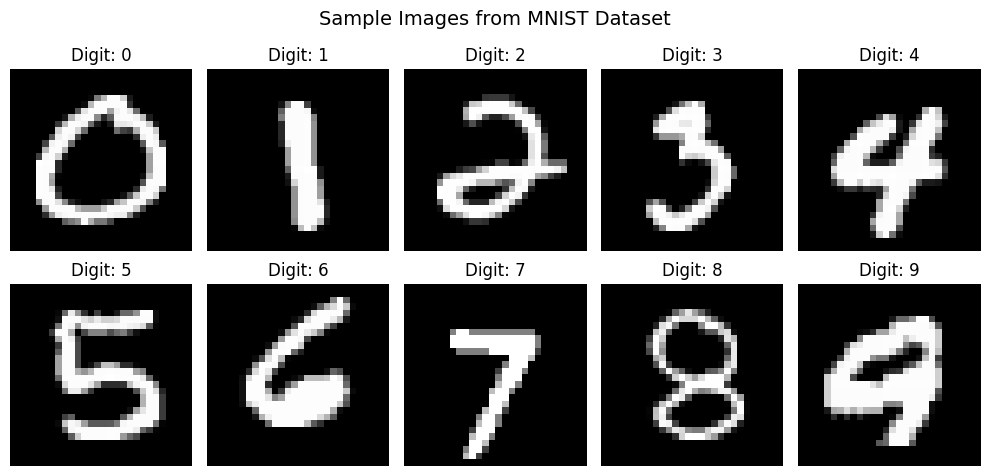

In [ ]:
# Select one example of each digit (0-9)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Sample Images from MNIST Dataset", fontsize=14)

for i in range(10):
    ax = axes[i // 5, i % 5]  # Arrange in a 2x5 grid
    idx = np.where(y_train == i)[0][0]  # Find first occurrence of digit i
    ax.imshow(x_train[idx], cmap="gray")
    ax.set_title(f"Digit: {i}")
    ax.axis("off")

plt.tight_layout()
plt.show()


**Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler


# Reshape images into 2D (flatten each image)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Print shapes before scaling
print('x_train Shape:', x_train.shape)
print('x_train_flat Shape:', x_train_flat.shape)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform all sets
x_train_scaled = scaler.fit_transform(x_train_flat)
x_val_scaled = scaler.transform(x_val_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Reshape back to original image shape
x_train_scaled = x_train_scaled.reshape(x_train.shape)
x_val_scaled = x_val_scaled.reshape(x_val.shape)
x_test_scaled = x_test_scaled.reshape(x_test.shape)

# Check mean and standard deviation
print("\nMean after StandardScaler (should be ~0):", np.mean(x_train_scaled))
print("Std after StandardScaler (should be ~1):", np.std(x_train_scaled))


x_train Shape: (48000, 28, 28)
x_train_flat Shape: (48000, 784)

Mean after StandardScaler (should be ~0): -2.2733138123277016e-19
Std after StandardScaler (should be ~1): 0.955649154304235


**Build KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Flatten images since KNN works with 2D Input Data
x_train_flat = x_train_scaled.reshape(x_train_scaled.shape[0], -1)
x_val_flat = x_val_scaled.reshape(x_val_scaled.shape[0], -1)
x_test_flat = x_test_scaled.reshape(x_test_scaled.shape[0], -1)

# Define k values to test
k_values = [1, 3, 5, 7, 9]

# Store best k and accuracy
best_k = None
best_accuracy = 0

# Store accuracy results for plotting
val_accuracies = []

# Iterate over all k values
for k in k_values:
    # Train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)

    # Evaluate on validation set
    y_val_pred = knn.predict(x_val_flat)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

    print(f"k={k} -> Validation Accuracy: {val_accuracy:.4f}")

    # If this is the best k then update best modal
    if val_accuracy > best_accuracy:
        best_k = k
        best_accuracy = val_accuracy

print(f"\nBest k={best_k}, Best Validation Accuracy: {best_accuracy:.4f}")


k=1 -> Validation Accuracy: 0.9453
k=3 -> Validation Accuracy: 0.9457
k=5 -> Validation Accuracy: 0.9456
k=7 -> Validation Accuracy: 0.9440
k=9 -> Validation Accuracy: 0.9439

Best k=3, Best Validation Accuracy: 0.9457


**Plot of K Values and Validation Accuracy**

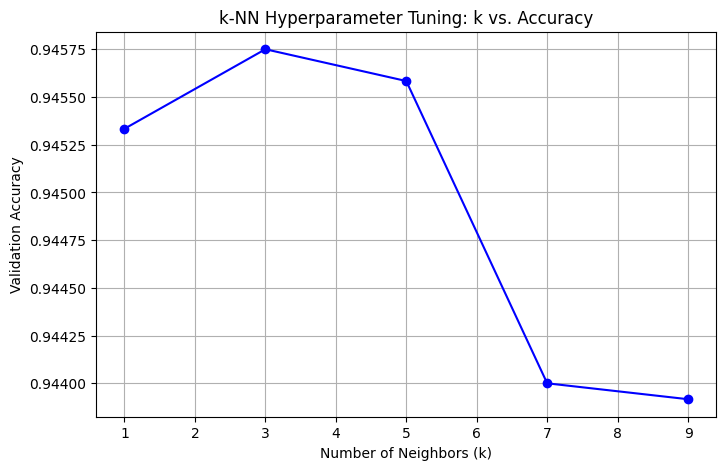

In [ ]:
# Plot validation accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, val_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title("k-NN Hyperparameter Tuning: k vs. Accuracy")
plt.grid()
plt.show()

**Retrain With Best K Value**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Combine train and validation sets for final training
x_train_final = np.concatenate((x_train_flat, x_val_flat), axis=0)
y_train_final = np.concatenate((y_train, y_val), axis=0)

# Train k-NN with the best k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x_train_final, y_train_final)

# Evaluate on test set
y_test_pred = final_knn.predict(x_test_flat)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))

Test Accuracy: 0.9451

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.97      0.96      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.94     10000



**Confusion Matrix**

Confusion Matrix:
[[ 967    0    1    3    0    4    5    0    0    0]
 [   0 1127    3    0    1    0    3    0    1    0]
 [  12    9  967   15    2    0    5   11    9    2]
 [   0    4    5  963    2   14    0   12    8    2]
 [   1    9    5    2  922    2    7    4    3   27]
 [   7    0    5   22    4  828    9    2    7    8]
 [  14    4    2    0    3    9  924    0    2    0]
 [   0   22   12    4    7    2    0  953    1   27]
 [  15    3   10   24   10   22    3    7  873    7]
 [   5    6    6   11   16    7    0   28    3  927]]


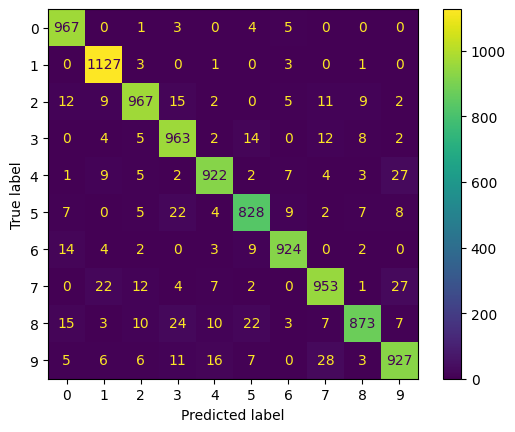

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:")
print(conf_matrix)

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_test_pred)


**Number of Misclassifications**

In [ ]:
# Find misclassified cases
misclassified_idx = np.where(y_test != y_test_pred)[0]

# Count misclassifications per digit
misclass_counts = np.zeros(10)
for idx in misclassified_idx:
    misclass_counts[y_test[idx]] += 1

# Print misclassification counts
for i in range(10):
    print(f"Digit {i}: {int(misclass_counts[i])} misclassified")


Digit 0: 13 misclassified
Digit 1: 8 misclassified
Digit 2: 65 misclassified
Digit 3: 47 misclassified
Digit 4: 60 misclassified
Digit 5: 64 misclassified
Digit 6: 34 misclassified
Digit 7: 75 misclassified
Digit 8: 101 misclassified
Digit 9: 82 misclassified


**Misclassified Examples**

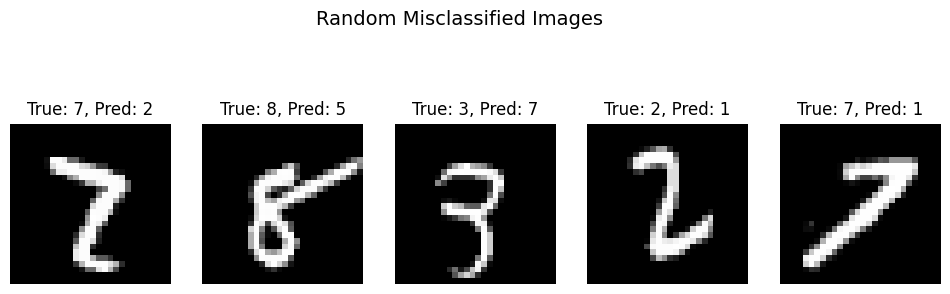

In [ ]:
import random

# Select 5 random misclassified images
random_samples = random.sample(list(misclassified_idx), 5)

# Plot misclassified images
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
fig.suptitle("Random Misclassified Images", fontsize=14)

for i, idx in enumerate(random_samples):
    axes[i].imshow(x_test[idx].reshape(28, 28), cmap="gray")
    axes[i].set_title(f"True: {y_test[idx]}, Pred: {y_test_pred[idx]}")
    axes[i].axis("off")

plt.show()


**Train Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "max_depth": [2, 5, 10],
    "min_samples_split": [2, 5]
}

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)


# Grid search internally splits the training data for cross-validation,
# so we can directly use the full training set (no need for separate validation data)
grid_search.fit(x_train_flat, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8453


**Documenting the Results**

In [ ]:
# Display all grid search results
print("\nGrid Search Results (Sorted by Accuracy):")
cv_results = grid_search.cv_results_
sorted_indices = np.argsort(cv_results["mean_test_score"])[::-1]  # Sort in descending order

for i in sorted_indices:
    depth = cv_results["param_max_depth"][i]
    min_samples = cv_results["param_min_samples_split"][i]
    acc = cv_results["mean_test_score"][i]
    print(f"max_depth={depth}, min_samples_split={min_samples} -> CV Accuracy: {acc:.4f}")

best_depth = grid_search.best_params_["max_depth"]
best_min_samples_split = grid_search.best_params_["min_samples_split"]
best_accuracy = grid_search.best_score_

print(f"\nSelected Best Model: max_depth={best_depth}, min_samples_split={best_min_samples_split}")
print("This model was chosen because it achieved the highest cross-validation accuracy.")



Grid Search Results (Sorted by Accuracy):
max_depth=10, min_samples_split=2 -> CV Accuracy: 0.8453
max_depth=10, min_samples_split=5 -> CV Accuracy: 0.8451
max_depth=5, min_samples_split=5 -> CV Accuracy: 0.6686
max_depth=5, min_samples_split=2 -> CV Accuracy: 0.6686
max_depth=2, min_samples_split=5 -> CV Accuracy: 0.3392
max_depth=2, min_samples_split=2 -> CV Accuracy: 0.3392

Selected Best Model: max_depth=10, min_samples_split=2
This model was chosen because it achieved the highest cross-validation accuracy.


**Training Decision Tree With Best Parameters**

In [ ]:
# Train final Decision Tree with the best hyperparameters
best_tree_classifier = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)
best_tree_classifier.fit(x_train_final, y_train_final)

# Predict on the test set
y_pred_best_tree = best_tree_classifier.predict(x_test_flat)

# Print Classification Report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_best_tree, target_names=[f"Digit {i}" for i in range(10)]))



Classification Report for Decision Tree:
              precision    recall  f1-score   support

     Digit 0       0.91      0.94      0.92       980
     Digit 1       0.95      0.96      0.95      1135
     Digit 2       0.85      0.84      0.84      1032
     Digit 3       0.82      0.84      0.83      1010
     Digit 4       0.86      0.85      0.86       982
     Digit 5       0.84      0.80      0.82       892
     Digit 6       0.91      0.87      0.89       958
     Digit 7       0.90      0.88      0.89      1028
     Digit 8       0.80      0.81      0.80       974
     Digit 9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



**Confusion Matrix**

Confusion Matrix for Decision Tree:
[[ 918    0   10    8    6   11    7    4   13    3]
 [   1 1089   12   13    2    5    2    1   10    0]
 [  15   11  864   20   22    8   12   34   35   11]
 [   7    5   39  845    6   47    2   19   23   17]
 [   3    4    7    7  833    7   12    8   28   73]
 [  16    9    5   51   14  716   20    8   30   23]
 [  23    5   13    7   34   17  833    3   21    2]
 [   3   14   26   10   10    4    0  906   11   44]
 [   9   10   30   40   14   21   19    9  791   31]
 [  13    2    8   32   24   14    5   13   31  867]]


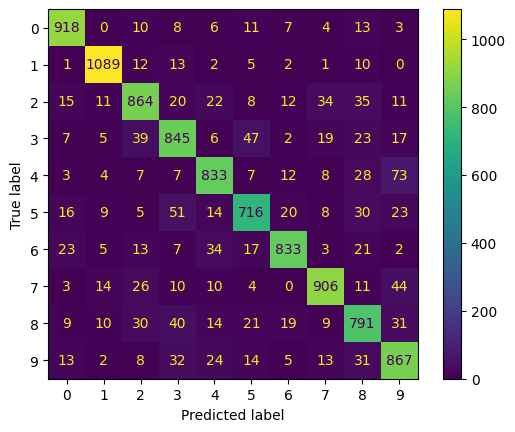

In [ ]:
# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_best_tree)

print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)

# Display the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_best_tree)

**Misclassification Counts**

In [ ]:
# Count misclassifications per digit
misclassified_counts = np.zeros(10)

for i in range(10):  # Loop over true labels (rows)
    for j in range(10):  # Loop over predicted labels (columns)
        if i != j:  # Ignore correct classifications
            misclassified_counts[i] += conf_matrix_dt[i, j]

# Print misclassification counts for each digit
for i in range(10):
    print(f"Digit {i} was misclassified {int(misclassified_counts[i])} times.")


Digit 0 was misclassified 62 times.
Digit 1 was misclassified 46 times.
Digit 2 was misclassified 168 times.
Digit 3 was misclassified 165 times.
Digit 4 was misclassified 149 times.
Digit 5 was misclassified 176 times.
Digit 6 was misclassified 125 times.
Digit 7 was misclassified 122 times.
Digit 8 was misclassified 183 times.
Digit 9 was misclassified 142 times.


**Most Confused Digit Pairs**

In [ ]:
# Get top 3 misclassified pairs
flat_conf_matrix = conf_matrix_dt_copy.flatten()
top_3_indices = np.argsort(flat_conf_matrix)[-3:]  # Get indices of top 3 misclassifications

print("\nTop 3 Most Frequently Confused Digit Pairs:")
for index in reversed(top_3_indices):  # Print from highest to lowest
    row, col = np.unravel_index(index, conf_matrix_dt.shape)
    print(f"Digit {row} → Misclassified as {col} ({conf_matrix_dt[row, col]} times)")




Top 3 Most Frequently Confused Digit Pairs:
Digit 4 → Misclassified as 9 (73 times)
Digit 5 → Misclassified as 3 (51 times)
Digit 3 → Misclassified as 5 (47 times)


**Example of Confused Digits**

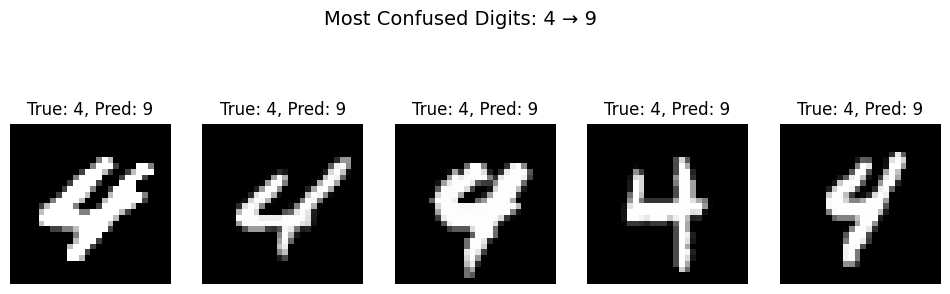

In [ ]:
# Find the most frequently confused digit pairs
conf_matrix_dt_copy = conf_matrix_dt.copy()
np.fill_diagonal(conf_matrix_dt_copy, 0)  # Remove correct classifications
most_confused_pair = np.unravel_index(np.argmax(conf_matrix_dt_copy), conf_matrix_dt_copy.shape)

digit_true, digit_pred = most_confused_pair  # Extract most confused digits

# Find misclassified samples of the most confused digit pair
misclassified_indices = np.where((y_test == digit_true) & (y_pred_best_tree == digit_pred))[0]

# Select 5 random misclassified examples
random_samples = random.sample(list(misclassified_indices), min(5, len(misclassified_indices)))

# Plot the misclassified images
fig, axes = plt.subplots(1, len(random_samples), figsize=(12, 4))
fig.suptitle(f"Most Confused Digits: {digit_true} → {digit_pred}", fontsize=14)

for i, idx in enumerate(random_samples):
    axes[i].imshow(x_test[idx].reshape(28, 28), cmap="gray")
    axes[i].set_title(f"True: {digit_true}, Pred: {digit_pred}")
    axes[i].axis("off")

plt.show()

**Plotting ROC Curve and Calculating AUC**

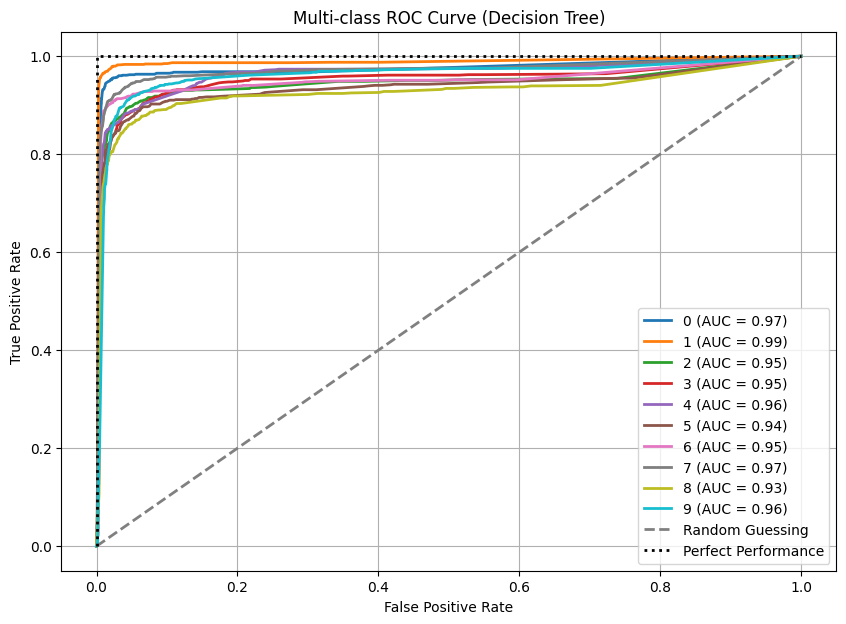

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc_curve(y_true, y_proba, class_names):
    # Binarize labels for multi-class ROC computation (One-vs-All)
    y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))

    plt.figure(figsize=(10, 7))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_proba[:, i])  # Use predicted probabilities
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})", lw=2)

    # Reference lines
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing", lw=2)
    plt.plot([0, 0, 1], [0, 1, 1], linestyle=":", color="black", label="Perfect Performance", lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-class ROC Curve (Decision Tree)")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Get predicted probabilities from Decision Tree
y_test_proba_dt = best_tree_classifier.predict_proba(x_test_flat)

# Define class names (Digits 0-9)
class_names = [str(i) for i in range(10)]

# Call the function to plot ROC curves
plot_multiclass_roc_curve(y_test, y_test_proba_dt, class_names)
